Итоговый проект

Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from seaborn import load_dataset
import seaborn as sns

%matplotlib inline

Загружаем файл diamonds.csv в DataFrame pandas

In [ ]:
df = pd.read_csv('diamonds.csv')

# Новый раздел

Согласно исходному описанию файла, в датасете должны присутствовать признаки:

fluor - флуоресценция (свойство камня светиться под ультрафиолетом)

symmetry - индикатор симметрии

platform - название платформы, на которой был установлен драгоценный камень

shape - фигура

color - цвет

clarity - прозрачность

cut - качество огранки (может быть только для круглых камней)

polish - полировка

id - номер драгоценного камня

date - дата

price - цена

carat - количество каратов

price_per_carat - цена за карат

z - длина (диаметр)

x - ширина

depth_perc - соотношение высоты и ширины

y - высота

Необходимо спрогнозировать price_per_carat

Посмотрим, что в действительности хранится в файле с помощью метода .head(), который по умолчанию выводит пять первых строк

In [ ]:
df.head()

,Unnamed: 0,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
0,135269,NONE,EX,jamesallen,PS,F,SI1,NaN,EX,13870838,202206,12850.0,1.55,8290.32,10.29,6.41,62.0,3.97420
1,48477,MED,EX,jamesallen,RD,H,VVS2,EX,EX,11725253,202207,7510.0,1.02,7362.75,6.41,6.45,62.5,4.03125
2,236786,NONE,EX,jamesallen,EM,H,IF,NaN,EX,14444347,202205,21220.0,2.01,10557.21,8.60,6.37,65.0,4.14050
3,235781,NONE,EX,jamesallen,RD,E,VS2,EX,EX,14438434,202207,8660.0,1.00,8660.00,6.39,6.44,61.4,3.95416
4,277744,NONE,VG,jamesallen,RD,F,VS1,VG,EX,14615276,202206,8480.0,1.00,8480.00,6.28,6.36,62.3,3.96228


Как видим, первые пять строк датасета содержат по ряду признаков пустые значения (cut, fluor), при этом пустые значения признака fluor заданы как NONE.

Также загруженный файл помимо перечисленных в описании признаков содержит непоименнованный столбец.

Заменим все вхождения NONE пустыми значениями

In [ ]:
df = df.replace({'NONE': np.nan})

Посмотрим на размер данных (количество строк, колонок/признаков):

In [ ]:
df.shape

(222222, 18)

Датасет содержит 18 признаков и 222222 строк.

#Отсутствующие данные

Оценим сколько значений в каждом столбце и формат данных

In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222222 entries, 0 to 222221
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       222222 non-null  int64  
 1   fluor            80161 non-null   object 
 2   symmetry         222218 non-null  object 
 3   platform         222218 non-null  object 
 4   shape            222218 non-null  object 
 5   color            222218 non-null  object 
 6   clarity          222218 non-null  object 
 7   cut              148981 non-null  object 
 8   polish           222218 non-null  object 
 9   id               222222 non-null  int64  
 10  date             222222 non-null  int64  
 11  price            222222 non-null  float64
 12  carat            222222 non-null  float64
 13  price_per_carat  222222 non-null  float64
 14  z                222222 non-null  float64
 15  x                222222 non-null  float64
 16  depth_perc       222222 non-null  floa

Построим гистограмму для числа отсутствующих значений в записи.

created missing indicator for: fluor
created missing indicator for: symmetry
created missing indicator for: platform
created missing indicator for: shape
created missing indicator for: color
created missing indicator for: clarity
created missing indicator for: cut
created missing indicator for: polish


<Axes: xlabel='index'>

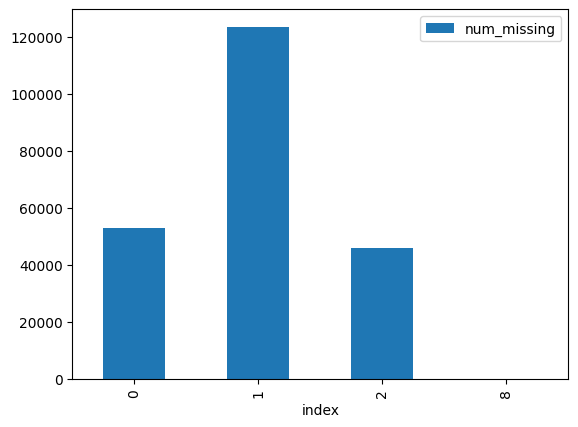

In [ ]:
# создаем копию датасета и в столбцах копии помечаем ячейки с пустыми значениями
df_ismissing = df.copy()
for col in df_ismissing.columns:
    missing = df_ismissing[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        df_ismissing['{}_ismissing'.format(col)] = missing

# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in df_ismissing.columns if 'ismissing' in col]
df_ismissing['num_missing'] = df_ismissing[ismissing_cols].sum(axis=1)

df_ismissing['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


Как видно из проведенного анализа, из 222222 записей менее 6 тыс. строк не имеют ни одного пропущенного значения, более 12 тыс. и 4 тыс. строк содержат соответсвтенно одно и два пропущенных значения. Наибольшее число признаков с пустыми значениями - fluor, cut. Отметим, что в датасете присутствуют строки, в которых пропущены 8 значений.

Учитывая малочисленность строк, в которых 8 пропущенных значений, определим их количество и оценим насколько они могут быть полезны для дальнейшего анализа

In [ ]:
ind_missing = df_ismissing[df_ismissing['num_missing'] == 8].index
print(ind_missing)

Int64Index([52531, 86568, 209098, 220709], dtype='int64')


In [ ]:
df.iloc[ind_missing].shape
df.iloc[ind_missing].head()

,Unnamed: 0,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
52531,202754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86568,244620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209098,53946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220709,53948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


В нашем датасете имеется 4 пустые строки, которые можно удалить безболезнено для дальнейшего анализа

In [ ]:
# отбрасываем строки с большим количеством пропусков
ind_missing = df_ismissing[df_ismissing['num_missing'] == 8].index
print(ind_missing)
df = df.drop(ind_missing, axis=0)

Int64Index([52531, 86568, 209098, 220709], dtype='int64')


Убедимся, что строки удалены

created missing indicator for: fluor
created missing indicator for: cut


<Axes: xlabel='index'>

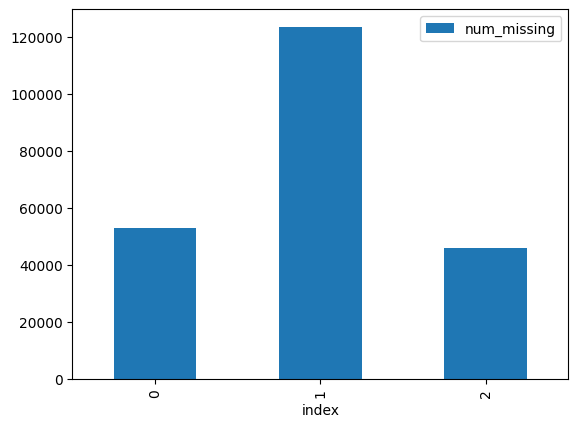

In [ ]:
df_ismissing = df.copy()
for col in df_ismissing.columns:
    missing = df_ismissing[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        df_ismissing['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in df_ismissing.columns if 'ismissing' in col]
df_ismissing['num_missing'] = df_ismissing[ismissing_cols].sum(axis=1)

df_ismissing['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

С незаданными значениями в датасете остались категориальные признаки fluor и cut. Если в дальнейшем эти данные будут признаны не информативными, можно будет удалить признаки либо строки, в которых имеются пропущенные значения. Если они будут признаны информативными, то можно провести мероприятия по внесению недостающих значений, использовав в качестве заполнителя наиболее часто встречающееся значение.

#Удаление неинформативных признаков

Чтобы узнать статистические характеристики нашего датасета (разброс значений, среднюю стоимость, медиану  и прочее) используем метод .describe(). Учитывая, что метод describe( ) пропускает строки и столбцы не содержащие чисел - категориальные признаки, используем аргумент - include = "all".

In [ ]:
df.describe(include = "all")

,Unnamed: 0,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
count,222218.000000,80161,222218,222218,222218,222218,222218,148981,222218,2.222180e+05,222218.000000,2.222180e+05,222218.000000,222218.000000,222218.000000,222218.000000,222218.000000,222218.000000
unique,NaN,3,4,1,10,10,9,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,FNT,EX,jamesallen,RD,G,SI2,EX,EX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,43400,131531,222218,118463,35446,48391,104609,192802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,226827.475016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.358856e+07,202206.044339,1.171541e+04,1.343014,7035.035166,7.083607,6.424106,64.087981,4.097928
std,130806.813138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.547882e+06,0.824541,2.540357e+04,0.724048,5216.408361,1.376995,1.045943,4.191885,0.599138
min,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.942300e+04,202205.000000,9.200000e+02,0.810000,1029.700000,4.520000,3.870000,46.000000,2.472100
25%,113432.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.359865e+07,202205.000000,4.210000e+03,1.000000,4148.510000,6.260000,5.690000,61.800000,3.811500
50%,226951.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.440046e+07,202206.000000,6.560000e+03,1.010000,5851.490000,6.530000,6.380000,63.000000,3.998400
75%,339883.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.483763e+07,202207.000000,1.160000e+04,1.500000,8609.270000,7.660000,6.820000,66.000000,4.322545


Очевидно, что признак platform можно не включать в дальнейший анализ, так как во всех строках датасета он принимает одно и тоже значение "jamesallen". Также исключим из анализа непоименнованный признак (столбец "Unnamed: 0") в связи с отсутствием описания признака.

In [ ]:
del df['platform']
del df['Unnamed: 0']

# Нетипичные данные (выбросы)

Для определения выбросов для численных признаков построим гистограмму

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'carat'}>],
       [<Axes: title={'center': 'price_per_carat'}>, <Axes: >]],
      dtype=object)

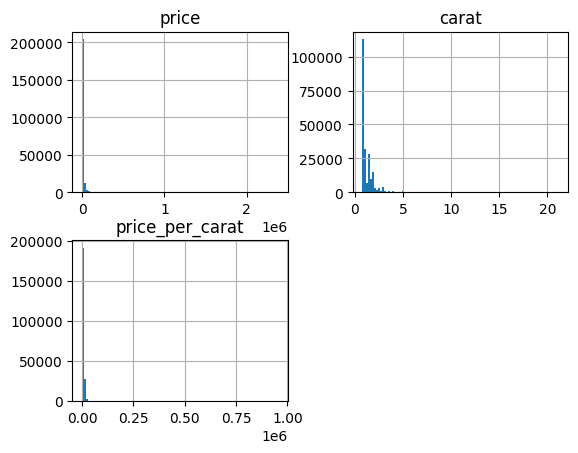

In [ ]:
df[['price','carat', 'price_per_carat']].hist(bins=100)

array([[<Axes: title={'center': 'z'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'depth_perc'}>,
        <Axes: title={'center': 'y'}>]], dtype=object)

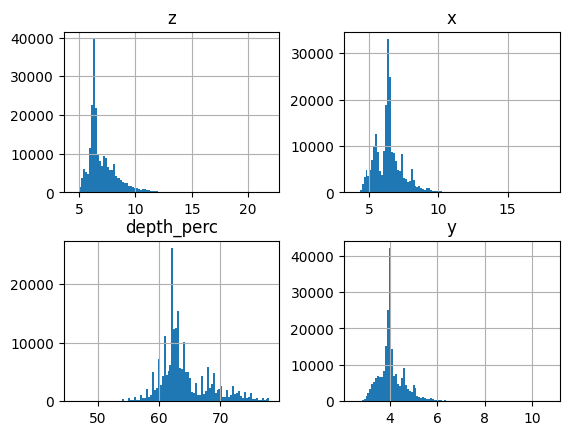

In [ ]:
df[['z',	'x',	'depth_perc', 'y']].hist(bins=100)

Из-за возможных выбросов данные выглядят сильно искаженными. Построим коробчатую диаграмму для более глубокого анализа

<Axes: >

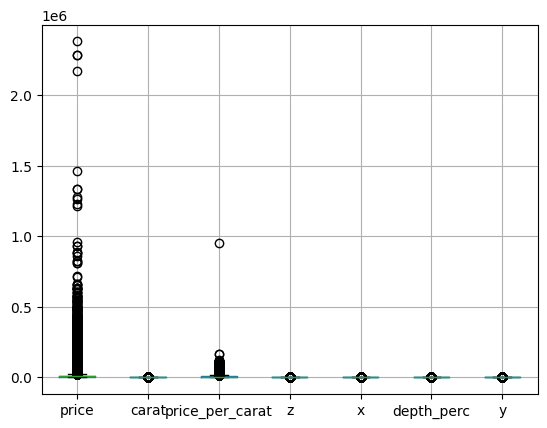

In [ ]:
df.boxplot(column=['price','carat', 'price_per_carat', 'z',	'x',	'depth_perc', 'y'])

In [ ]:
q1,q9= df["price"].quantile([0.1,0.9])
mask=df["price"].between(q1,q9)
sns.boxplot(x="price_per_carat",y="price", data=df[mask])



NameError: ignored

<Axes: >

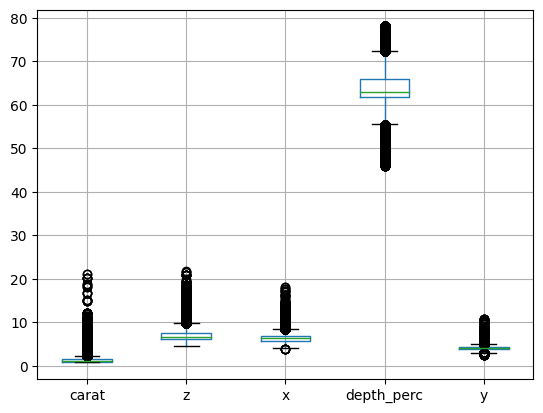

In [ ]:
df.boxplot(column=['carat',  'z',	'x',	'depth_perc', 'y'])

<Axes: >

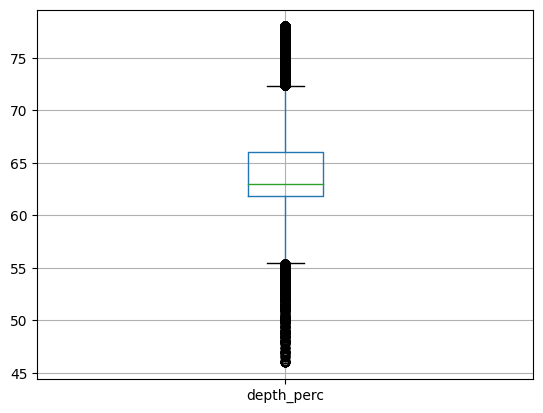

In [ ]:
df.boxplot(column=['depth_perc'])

Видим, что есть выбросы со значением более 2**10*^6.

Описательная статистика

Проанализируем описательную статистику данного признака

Например, для признака price видно, что максимальное значение равно 2.38 \* 10*^6	, в то время как 75% квартиль равен только 1.16 *10*^4. Значения price более 2**10*^6
 – выброс.

Оценим число уникальных значений по каждому из признаков

In [ ]:
df.nunique()

fluor                   3
symmetry                4
shape                  10
color                  10
clarity                 9
cut                     3
polish                  3
id                 162277
date                    3
price                8436
carat                 631
price_per_carat     52604
z                    1115
x                     903
depth_perc            317
y                   37649
dtype: int64

In [ ]:
df['fluor'].unique()

array([nan, 'MED', 'FNT', 'STG'], dtype=object)

In [ ]:
df['symmetry'].unique()

array(['EX', 'VG', 'G', 'No'], dtype=object)

In [ ]:
df['shape'].unique()

In [ ]:
df['color'].unique()

In [ ]:
df['clarity'].unique()

In [ ]:
df['cut'].unique()

In [ ]:
df['polish'].unique()

In [ ]:
df['date'].unique()

Отбрасывание записей

In [ ]:
df.groupby(df['fluor'].isnull()).mean().value_counts(normalize=True)

In [ ]:
df.groupby(df['fluor'].isnull()).std().value_counts(normalize=True)

In [ ]:
df.groupby(df['fluor'].isnull())['price_per_carat'].value_counts(normalize=True)

Задание 1: Очистка (2 балла)
Не все камни успевают продаться за один месяц, поэтому в таблице есть повторы. Объедините данные по одному камню: подумайте, как лучше это сделать, какую цену брать.

Попробуйте найти аномалии: вдруг цена на некоторые камни сильно меняется (то есть продавец сам не знает, по какой цене их продавать). Также убедитесь, что остальные параметры камня не меняются.

In [ ]:
df['Counts_id'] = df['id'].map(df['id'].value_counts())
df_three = df.loc[df['Counts_id'] > 1]
df_three.shape

In [ ]:
id_stat = df.groupby(by='id')['carat'].count().to_frame() #Посчитайте статистику по кол-ву камней

# разделите выборку на две части

#df_one = df.query('...') # те драгоценные камни, которые встсретились 1 раз
#df_three = df.query('...') # те драгоценные камни, которые встсретились 2-3 раза

stat = df_three.groupby('id')['...'].agg(np.std) # Посчитайте дстандартное отклонение по нескольким полям,
# подумайте где оно должно равняться 0, а где меняться в каких-то разумных пределах

# Удалите аномальные наблюдения
df_three = df_three.query('...').sort_values(by=['id','date'])

df_three = df_three.groupby('...').agg('l...').reset_index() # тепреь в качестве цены возьмем последнее значение по времени

df = pd.concat([df_one, df_three]).reset_index(drop=True) # соединяем результаты